In [1]:
os.chdir(
    # "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/count/Hypothesis/Fisher/sig/"
#     "/Charles/project/ASm6A/shFUS/SNP_calling/08-Count/Hypothesis/Fisher/sig/"
    "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/count/Hypothesis/Fisher/sig/"
)
txt_list = [x for x in glob.glob("*.txt") if "overlap_" not in x]
result_dir = "matrix/forPlot/"
os.system("mkdir -p %s" % result_dir)


def format_file(in_file):
    prefix = os.path.basename(in_file).split(".txt")[0]
    df = pd.read_table(in_file, header=None)
    df.columns = [
        "contig", "position", "refAllele", "altAllele", "refRPKM_ratio",
        "altRPKM_ratio", "allelicRatio", "pvalue", "oddsratio", "qvalue",
        "refCount_ip", "altCount_ip", "refCount_input", "altCount_input",
        "mark"
    ]
    df = df[[
        'contig', 'position', 'refAllele', 'altAllele', 'allelicRatio',
        "refCount_ip", "altCount_ip", "refCount_input", "altCount_input",
        "mark"
    ]]
    df["allelicRatio_%s" % prefix] = df['allelicRatio']
    df["refCount_ip_%s" % prefix] = df['refCount_ip']
    df["altCount_ip_%s" % prefix] = df['altCount_ip']
    df["refCount_input_%s" % prefix] = df['refCount_input']
    df["altCount_input_%s" % prefix] = df['altCount_input']
    df['mark_%s' % prefix] = df['mark']
    del df['allelicRatio']
    del df["refCount_ip"]
    del df["altCount_ip"]
    del df["refCount_input"]
    del df["altCount_input"]
    del df['mark']
    return df


df = format_file(txt_list[0])
for txt in txt_list[1:]:
    df_i = format_file(txt)
    df = df.merge(df_i,
                  on=['contig', 'position', 'refAllele', 'altAllele'],
                  how="outer")
col_list = df.columns[4:]
col_list = sorted(col_list)
res = os.path.join(result_dir, "totalSamples_count.txt")
new_cols = ['contig', 'position', 'refAllele', 'altAllele'] + col_list
df[new_cols].to_csv(res, sep="\t", index=False)

In [2]:
#### Based on the changes before and after FUS knockdown, ASm6As were divided into four categories.
# 1. lost;
# 2. gain
# 3. unchanging
# 4. reverse
#### The trend must be the same for both wt1 and wt2.
#### The trend must be the same for 3/4 kd samples, including kd1-1, kd1-2, kd2-1, kd2-2.
os.chdir(
    # "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/count/Hypothesis/Fisher/sig/matrix/"
#     "/Charles/project/ASm6A/shFUS/SNP_calling/08-Count/Hypothesis/Fisher/sig/matrix/"
    "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/count/reformat/overlapPeak/Hypothesis/Fisher/sig/matrix/"
)
in_file = "totalSamples.txt"
df = pd.read_table(in_file)
mark_list = [x for x in df.columns if "mark" in x]

#### ASm6A change
def pick_changeASm6A(df):
    df = df[(~df['mark_wt1'].isna()) & (~df['mark_wt2'].isna())]
    df = df[(df['mark_wt1'] != "unsig") & (df['mark_wt2'] != "unsig")]
    df = df[df['mark_wt1'] == df['mark_wt2']]
    ##
    df_ref = df[df['mark_wt1'] == "ref"]
    df_ref['sum'] = (df_ref[mark_list] == "ref").sum(axis=1)
    df_ref = df_ref[(df_ref['sum'] <= 2)]
    ##
    df_alt = df[df['mark_wt1'] == "alt"]
    df_alt['sum'] = (df_alt[mark_list] == "alt").sum(axis=1)
    df_alt = df_alt[(df_alt['sum'] <= 2)]
    ##
    df = pd.concat([df_ref, df_alt])
    print("change %d" % len(df))
    df.to_csv("Changing_ASm6As.txt", sep="\t", index=False)


#### ASm6A lost
def pick_loseASm6A(df):
    df = df[(~df['mark_wt1'].isna()) & (~df['mark_wt2'].isna())]
    df = df[(df['mark_wt1'] != "unsig") & (df['mark_wt2'] != "unsig")]
    df = df[df['mark_wt1'] == df['mark_wt2']]
    df['sum'] = (df[mark_list] == "unsig").sum(axis=1)
    df = df[df['sum'] >= 2] ###
    print("lose %d" % len(df))
    df.to_csv("Lost_ASm6As.txt", sep="\t", index=False)


#### ASm6A gain
def pick_gainASm6A(df):
    df = df[(~df['mark_wt1'].isna()) & (~df['mark_wt2'].isna())]
    df = df[(df['mark_wt1'] == "unsig") & (df['mark_wt2'] == "unsig")]
    df['sum_ref'] = (df[mark_list] == "ref").sum(axis=1)
    df['sum_alt'] = (df[mark_list] == "alt").sum(axis=1)
    df = df[(df['sum_ref'] >= 2) | (df['sum_alt'] >= 2)] ###
    print("gain %d" % len(df))
    df.to_csv("Gain_ASm6As.txt", sep="\t", index=False)


#### ASm6A still
def pick_stillASm6A(df):
    df = df[(~df['mark_wt1'].isna()) & (~df['mark_wt2'].isna())]
    df = df[(df['mark_wt1'] != "unsig") & (df['mark_wt2'] != "unsig")]
    df = df[df['mark_wt1'] == df['mark_wt2']]
    df['sum_ref'] = (df[mark_list] == "ref").sum(axis=1)
    df['sum_alt'] = (df[mark_list] == "alt").sum(axis=1)
    df = df[(df['sum_ref'] >= 4) | (df['sum_alt'] >= 4)] ###
    print("unchanging %d" % len(df))
    df.to_csv("Unchanging_ASm6As.txt", sep="\t", index=False)

#### ASm6A reverse
def pick_reverseASm6A(df):
    df = df[(~df['mark_wt1'].isna()) & (~df['mark_wt2'].isna())]
    df = df[(df['mark_wt1'] != "unsig") & (df['mark_wt2'] != "unsig")]
    df = df[df['mark_wt1'] == df['mark_wt2']]
    ##
    df_ref = df[df['mark_wt1'] == "ref"]
    df_ref['sum'] = (df_ref[mark_list] == "alt").sum(axis=1)
    df_ref = df_ref[(df_ref['sum'] >= 2)] ####
    ##
    df_alt = df[df['mark_wt1'] == "alt"]
    df_alt['sum'] = (df_alt[mark_list] == "ref").sum(axis=1)
    df_alt = df_alt[(df_alt['sum'] >= 2)] #####
    ##
    df = pd.concat([df_ref, df_alt])
    print("Reverse %d" % len(df))
    df.to_csv("Reverse_ASm6As.txt", sep="\t", index=False)
    
    
pick_changeASm6A(df)
pick_loseASm6A(df)
pick_gainASm6A(df)
pick_stillASm6A(df)
pick_reverseASm6A(df)

KeyError: 'mark_wt1'

In [12]:
### txt to bed
os.chdir("/Charles/project/ASm6A/shFUS/SNP_calling/08-Count/Hypothesis/Fisher/sig/matrix/")
# infile = "Changing_ASm6As.txt"
infile = "Unchanging_ASm6As.txt"
result_dir = "for_exper/"

# fus_peak = "/Charles/project/ASm6A/data/RBP/union/union.bed"
fus_peak = "/Charles/project/ASm6A/data/RBP/union/ContainingFUS_genes.bed"
def reformat_file(in_file):
    df = pd.read_table(in_file)
    mark_list = [x for x in df.columns if "mark" in x]
    df['start'] = df['position'] - 1
    df = df[['contig', 'start', 'position'] + mark_list]
    df.columns = ['#contig', 'start', 'position'] + mark_list
    result_bed = os.path.join(result_dir, "%s.bed" % os.path.basename(in_file).split(".")[0])
    df.to_csv(result_bed, sep="\t", index=False)
    return result_bed

def split_into_twoGroup(in_bed):
    p = os.path.basename(in_bed).split("_")[0]
    overlap_bed, non_bed = os.path.join(result_dir, "FUStarget_%s.bed"%p), os.path.join(result_dir, "Nonetarget_%s.bed"%p)
    os.system("bedtools intersect -a %s -b %s -wa -header > %s" % (in_bed, fus_peak, overlap_bed))
    os.system("bedtools intersect -a %s -b %s -v -wa -header > %s" % (in_bed, fus_peak, non_bed))
#     return overlap_bed, non_bed

tmp_bed = reformat_file(infile)
split_into_twoGroup(tmp_bed)

In [5]:
#3##
infile = "/Charles/project/ASm6A/shFUS/SNP_calling/08-Count/Hypothesis/Fisher/sig/matrix/totalSamples.txt"
resfile= "/Charles/project/ASm6A/shFUS/SNP_calling/08-Count/Hypothesis/Fisher/sig/matrix/totalSamples.txt2"
df = pd.read_table(infile, sep="\t")
df = df[(~df['mark_wt1'].isna()) & (~df['mark_wt2'].isna())]
# df = df[(df['mark_wt1'] != "unsig") & (df['mark_wt2'] != "unsig")]
df = df[df['mark_wt1'] == df['mark_wt2']]
df.to_csv(resfile, sep="\t", index=False)

In [2]:
#### for single sample

os.chdir(
    "/Charles/project/ASm6A/shFUS/SNP_calling/08-Count/Hypothesis/Fisher/sig/matrix/"
)
result_dir = "by_sample/"
os.system("mkdir -p %s" % result_dir)
# fus_peak = "/Charles/project/ASm6A/data/RBP/union/ContainingFUS_genes.bed"
fus_peak = "/Charles/project/ASm6A/data/RBP/union/union.bed"

def reformat_file(col_wt, col_kd):
    in_file = "totalSamples.txt"
    df = pd.read_table(in_file)
    mark_list = [x for x in df.columns if "mark" in x]
    ##
    df = df[~df[col_wt].isna()]
    df = df[~df[col_kd].isna()]
    df['start'] = df['position'] - 1
    df = df[['contig', 'start', 'position', col_wt, col_kd]]
    df.columns = ['#contig', 'start', 'position', col_wt, col_kd]
    result_bed = os.path.join(result_dir, "%s_%s.bed" % (col_kd, col_wt))
    df.to_csv(result_bed, sep="\t", index=False)
    return result_bed

def split_into_twoGroup(in_bed):
    overlap_bed, non_bed = os.path.join(result_dir, "Overlap.bed"), os.path.join(result_dir, "None.bed")
    os.system("bedtools intersect -a %s -b %s -wa -header > %s" % (in_bed, fus_peak, overlap_bed))
    os.system("bedtools intersect -a %s -b %s -v -wa -header > %s" % (in_bed, fus_peak, non_bed))
    return overlap_bed, non_bed

def calc_change(col_wt, col_kd, in_bed):
    df = pd.read_table(in_bed, sep="\t")
    df_lose = df[(df[col_wt] != "unsig") & (df[col_wt] != df[col_kd])]
    df_still = df[df[col_wt] == df[col_kd]]
    df_changing = df[df[col_wt] != df[col_kd]]
    print(os.path.basename(in_bed))
    print("lose:unchanging:changing: \t%s:%s:%s" % (str(len(df_lose)), str(len(df_still)), str(len(df_changing))))
    print("#### lose")
    print(df_lose)
    print("#### unchanging")
    print(df_still)
    print("#### changing")
    print(df_changing)
    
#     df.to_csv("Changing_ASm6As.txt", sep="\t", index=False)

wt_name, kd_name = 'mark_wt1','mark_kd2-2'
print(kd_name, wt_name)
a_bed = reformat_file(wt_name, kd_name)
overlap_bed, non_bed = split_into_twoGroup(a_bed)
calc_change(wt_name, kd_name, overlap_bed)
calc_change(wt_name, kd_name, non_bed)

mark_kd2-2 mark_wt1
Overlap.bed
lose:unchanging:changing: 	1:5:3
#### lose
  #contig     start  position mark_wt1 mark_kd2-2
5   chr13  67800934  67800935      ref      unsig
#### unchanging
  #contig      start   position mark_wt1 mark_kd2-2
1    chr8   25364810   25364811    unsig      unsig
2    chr2  202245243  202245244      ref        ref
3    chr5    1462097    1462098    unsig      unsig
4   chr12   95694393   95694394    unsig      unsig
7   chr17   44248847   44248848    unsig      unsig
#### changing
  #contig      start   position mark_wt1 mark_kd2-2
0    chr2  135711515  135711516    unsig        alt
5   chr13   67800934   67800935      ref      unsig
6   chr17   27613676   27613677    unsig        alt
None.bed
lose:unchanging:changing: 	172:175:270
#### lose
    #contig      start   position mark_wt1 mark_kd2-2
1      chr1      14676      14677      alt        ref
3      chr1    6693096    6693097      ref      unsig
5      chr1   28800379   28800380      alt      unsig
6

In [7]:
matrix_file = "/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/count/reformat/overlapPeak/Hypothesis/Fisher/sig/matrix/totalSamples.txt"
df = pd.read_table(matrix_file)
mark_list = [x for x in df.columns if "mark" in x]
df = df[mark_list]
df.head()

df_unsig = df[df['mark_nc'] == "unsig"]
print(len(df_unsig))
df_unsig['sum'] = (df_unsig[mark_list] == "unsig").sum(axis=1)
df_unsig = df_unsig[(df_unsig['sum'] >= 3)]

df_ref = df[df['mark_nc'] == "ref"]
print(len(df_ref))
df_ref['sum'] = (df_ref[mark_list] == "ref").sum(axis=1)
df_ref = df_ref[(df_ref['sum'] >= 3)]

df_alt = df[df['mark_nc'] == "alt"]
print(len(df_alt))
df_alt['sum'] = (df_alt[mark_list] == "alt").sum(axis=1)
df_alt = df_alt[(df_alt['sum'] >= 3)]
print(len(df), len(df_unsig), len(df_ref), len(df_alt))

1790
70
64
2223 1002 2 2


/home/galaxy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/galaxy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/galaxy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [1]:
#### nc vs T1, nc vs T2
os.chdir("/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/count/reformat/overlapPeak/Hypothesis/Fisher/sig/matrix/")
in_file = "totalSamples.txt"

def write_to_file(df_list, result_file):
    df = pd.concat(df_list)
    df['chr'] = df.iloc[:,0]
    df['end'] = df.iloc[:,1]
    df['start'] = df['end'] - 1
    df[['chr','start','end']].to_csv(result_file, sep="\t", header=False, index=False)
    
#### nc vs T1
def compare_twoSamples(kd_sample):
    ##
    df_list = []
    ##
    result_dir = kd_sample
    os.system("mkdir -p %s" % result_dir)
    ###############################
    df = pd.read_table(in_file, sep="\t")
    mark_list = [x for x in df.columns if "mark" in x]
    df = df[["contig", "position"] + mark_list]
    df = df[~df["mark_nc"].isna()]
    ## unchanging
    df_1 = df[(df['mark_nc'] == "unsig") & (df[kd_sample] == "unsig")]
    df_2 = df[(df['mark_nc'] == "ref") & (df[kd_sample] == "ref")]
    df_3 = df[(df['mark_nc'] == "alt") & (df[kd_sample] == "alt")]
    num_unchanging = len(df_1) + len(df_2) + len(df_3)
    print("unchanging:\t%d" % num_unchanging)
    write_to_file([df_1, df_2, df_3], os.path.join(result_dir, "unchanging.bed"))
    ## lost
    df_1 = df[(df['mark_nc'] == "ref") & (df[kd_sample] == "unsig")]
    df_2 = df[(df['mark_nc'] == "alt") & (df[kd_sample] == "unsig")]
    num_lose = len(df_1) + len(df_2)
    print("lost:\t%d" % num_lose)
    write_to_file([df_1, df_2], os.path.join(result_dir, "lost.bed"))
    df_list += [df_1, df_2]
    #
    ## gain
    df_1 = df[(df['mark_nc'] == "unsig") & (df[kd_sample] == "ref")]
    df_2 = df[(df['mark_nc'] == "unsig") & (df[kd_sample] == "alt")]
    num_gain = len(df_1) + len(df_2)
    print("gain:\t%d" % num_gain)
    write_to_file([df_1, df_2], os.path.join(result_dir, "gain.bed"))
    df_list += [df_1, df_2]
    ## reverse
    df_1 = df[(df['mark_nc'] == "alt") & (df[kd_sample] == "ref")]
    df_2 = df[(df['mark_nc'] == "ref") & (df[kd_sample] == "alt")]
    num_reverse = len(df_1) + len(df_2)
    print("reverse:\t%d" % num_reverse)
    write_to_file([df_1, df_2], os.path.join(result_dir, "reverse.bed"))
    df_list += [df_1, df_2]
    ##
    return df_list
    
df_list_1 = compare_twoSamples("mark_T1")
print("###################")
df_list_2 = compare_twoSamples("mark_T2")
####
write_to_file(df_list_1 + df_list_2, "changed_ASm6As_inT1T2.txt")

unchanging:	1556
lost:	42
gain:	226
reverse:	9
###################
unchanging:	830
lost:	12
gain:	24
reverse:	0


In [26]:
####  overlap FUS or not
# fus = "/home/galaxy/data/RBP/POSTAR/POSTAR_bed/FUS_HEK293T_hg19.bed"
# fus = "/home/galaxy/data/RBP/POSTAR/POSTAR_bed/FUS_brain_hg19.bed"
# fus = "/home/galaxy/data/RBP/ENCODE/20201124_2121/merged_bed/hg19/rename/union_peaks/FUS.bed"
# fus = "/Charles/project/ASm6A/data/RBP/union/union.bed"
# fus = "/Charles/project/ASm6A/data/RBP/union/ContainingFUS_genes.bed"
fus  = "/Charles/project/ASm6A/data/RBP/union/ContainingFUS_genes_promoter.bed"

os.chdir("/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/count/reformat/overlapPeak/Hypothesis/Fisher/sig/matrix/mark_T2/")
bed_list = glob.glob("*.bed")
for bed in bed_list:
    num = os.popen("bedtools intersect -a %s -b %s -wa | sort -u | wc -l" % (bed, fus)).read().split()[0]
    print(bed, num)

reverse.bed 0
lose.bed 8
gain.bed 20
unchanging.bed 750


1833 1833


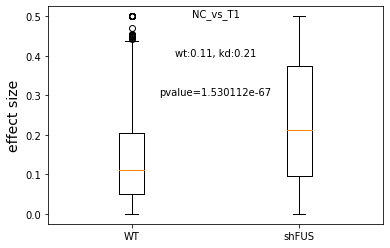

In [43]:
from scipy import stats
import matplotlib.pyplot as plt

#### calculate allelic ratio change
os.chdir("/Charles/mjy/210505_A00869_0471_BH3NHMDSX2/count/reformat/overlapPeak/Hypothesis/Fisher/sig/matrix/")
in_file = "totalSamples.txt"
df = pd.read_table(in_file, sep="\t")
mark_list = [x for x in df.columns if "allelicRatio" in x]
df = df[["contig", "position"] + mark_list]

kd_sample = 'allelicRatio_T1'
df_1 = df[['allelicRatio_nc', kd_sample]].dropna()  #######

n_wt_list, n_kd_list = df_1['allelicRatio_nc'].tolist(), df_1[kd_sample].tolist()
n_wt_list, n_kd_list = [abs(0.5-x) for x in n_wt_list], [abs(0.5-x) for x in n_kd_list]
n_median = "wt:%s, kd:%s" % (str(round(np.median(n_wt_list),2)), str(round(np.median(n_kd_list),2)))
n_stat, n_pvalue = stats.mannwhitneyu(n_wt_list, n_kd_list)
print(len(n_wt_list), len(n_kd_list))

####
x = [n_wt_list,n_kd_list]
plt.boxplot(x, labels=["WT","shFUS"])
plt.ylabel('effect size', size = 14)
plt.xticks(rotation=0)
plt.text(1.5, 0.3, 'pvalue=%e'%n_pvalue, horizontalalignment='center')
plt.text(1.5, 0.4, n_median, horizontalalignment='center')
plt.text(1.5, 0.5, "NC_vs_%s"%kd_sample.split("_")[1], horizontalalignment='center')
plt.show()